# Garth Migration

In [1]:
import garminconnect

## Login

Request email and password.  If MFA is enabled, Garth will request it.

In [2]:
from getpass import getpass

email = input("Enter email address: ")
password = getpass("Enter password: ")

garmin = garminconnect.Garmin(email, password)
garmin.login()

garmin.display_name

Enter email address:  franziska.witzel@gmail.com
Enter password:  ········


'franzlaeuft'

Save session

In [3]:
import os

GARTH_HOME = os.getenv("GARTH_HOME", "~/.garth")
garmin.garth.dump(GARTH_HOME)

# after running this cell, I have a folder .garth in my home directory and it 
# contains two authentication tokens (their content is quite different also), one of the files contains expiration 
# timestamps and such (and a refresh token as well)

## Get Connect stats

In [4]:
from datetime import date, timedelta

yesterday = date.today() - timedelta(days=1)
yesterday = yesterday.isoformat()
yesterday

'2025-07-19'

In [11]:
garmin.get_stats(yesterday).keys()

dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate'

In [558]:
garmin.get_user_summary(yesterday).keys()

dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate'

In [559]:
garmin.get_steps_data(yesterday)[:2]

[{'startGMT': '2025-07-16T22:00:00.0',
  'endGMT': '2025-07-16T22:15:00.0',
  'steps': 0,
  'pushes': 0,
  'primaryActivityLevel': 'sedentary',
  'activityLevelConstant': True},
 {'startGMT': '2025-07-16T22:15:00.0',
  'endGMT': '2025-07-16T22:30:00.0',
  'steps': 0,
  'pushes': 0,
  'primaryActivityLevel': 'sedentary',
  'activityLevelConstant': True}]

In [560]:
garmin.get_floors(yesterday).keys()

dict_keys(['startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'floorsValueDescriptorDTOList', 'floorValuesArray'])

In [561]:
garmin.get_daily_steps(yesterday, yesterday)

[{'calendarDate': '2025-07-17',
  'totalSteps': 5536,
  'totalDistance': 4505,
  'stepGoal': 6600}]

In [562]:
garmin.get_heart_rates(yesterday).keys()

dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'maxHeartRate', 'minHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate', 'heartRateValueDescriptors', 'heartRateValues'])

In [563]:
garmin.get_stats_and_body(yesterday).keys()

dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate'

In [564]:
garmin.get_body_composition(yesterday)

{'startDate': '2025-07-17',
 'endDate': '2025-07-17',
 'dateWeightList': [],
 'totalAverage': {'from': 1752710400000,
  'until': 1752796799999,
  'weight': None,
  'bmi': None,
  'bodyFat': None,
  'bodyWater': None,
  'boneMass': None,
  'muscleMass': None,
  'physiqueRating': None,
  'visceralFat': None,
  'metabolicAge': None}}

In [565]:
garmin.get_body_battery(yesterday)[0].keys()

dict_keys(['date', 'charged', 'drained', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'bodyBatteryValuesArray', 'bodyBatteryValueDescriptorDTOList', 'bodyBatteryDynamicFeedbackEvent', 'bodyBatteryActivityEvent'])

In [566]:
garmin.get_blood_pressure(yesterday)

{'from': '2025-07-17',
 'until': '2025-07-17',
 'measurementSummaries': [],
 'categoryStats': None}

In [567]:
garmin.get_max_metrics(yesterday)

[{'userId': 27447418,
  'generic': {'calendarDate': '2025-07-17',
   'vo2MaxPreciseValue': 40.5,
   'vo2MaxValue': 41.0,
   'fitnessAge': None,
   'fitnessAgeDescription': None,
   'maxMetCategory': 0},
  'cycling': None,
  'heatAltitudeAcclimation': {'calendarDate': '2025-07-17',
   'altitudeAcclimationDate': '2025-07-17',
   'previousAltitudeAcclimationDate': '2025-07-17',
   'heatAcclimationDate': '2025-07-17',
   'previousHeatAcclimationDate': '2025-07-17',
   'altitudeAcclimation': 0,
   'previousAltitudeAcclimation': 0,
   'heatAcclimationPercentage': 0,
   'previousHeatAcclimationPercentage': 0,
   'heatTrend': None,
   'altitudeTrend': None,
   'currentAltitude': 0,
   'previousAltitude': 0,
   'acclimationPercentage': 0,
   'previousAcclimationPercentage': 0,
   'altitudeAcclimationLocalTimestamp': '2025-07-17T12:24:09.0'}}]

In [568]:
garmin.get_hydration_data(yesterday)

{'userId': 27447418,
 'calendarDate': '2025-07-17',
 'valueInML': 0.0,
 'goalInML': 2449.0,
 'dailyAverageinML': None,
 'lastEntryTimestampLocal': '2025-07-17T11:50:16.0',
 'sweatLossInML': 349.0,
 'activityIntakeInML': 0.0}

In [569]:
garmin.get_respiration_data(yesterday).keys()

dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'sleepStartTimestampLocal', 'sleepEndTimestampLocal', 'tomorrowSleepStartTimestampGMT', 'tomorrowSleepEndTimestampGMT', 'tomorrowSleepStartTimestampLocal', 'tomorrowSleepEndTimestampLocal', 'lowestRespirationValue', 'highestRespirationValue', 'avgWakingRespirationValue', 'avgSleepRespirationValue', 'avgTomorrowSleepRespirationValue', 'respirationValueDescriptorsDTOList', 'respirationValuesArray', 'respirationAveragesValueDescriptorDTOList', 'respirationAveragesValuesArray', 'respirationVersion'])

In [570]:
garmin.get_spo2_data(yesterday).keys()

dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'sleepStartTimestampLocal', 'sleepEndTimestampLocal', 'tomorrowSleepStartTimestampGMT', 'tomorrowSleepEndTimestampGMT', 'tomorrowSleepStartTimestampLocal', 'tomorrowSleepEndTimestampLocal', 'averageSpO2', 'lowestSpO2', 'lastSevenDaysAvgSpO2', 'latestSpO2', 'latestSpO2TimestampGMT', 'latestSpO2TimestampLocal', 'avgSleepSpO2', 'avgTomorrowSleepSpO2', 'spO2ValueDescriptorsDTOList', 'spO2SingleValues', 'continuousReadingDTOList', 'spO2HourlyAverages'])

In [574]:
records = garmin.get_personal_record()

In [587]:
longest_run = [record for record in records if record['activityType'] == 'running' and record['typeId'] == 7]

In [590]:
# typeId 1 - 1km record
# typeID 7 - longest run
# run_records[1], type ID 3, activity 2527638163
# run_records[3], type ID 7 - my longest run!

In [600]:
# length of longest run
max_len = longest_run[0]['value']/1000

In [592]:
# get a specific activity by its ID
#garmin.get_activity(2527638163)

## Get data of this year

In [6]:
# get all my activities ever
import datetime as dt
today = date.today()
year_start = dt.date(2015,1,1)
activities = garmin.get_activities_by_date(year_start.isoformat(), today.isoformat())

In [7]:
len(activities)

919

In [73]:
import json

In [9]:
import datetime as dt
import numpy as np
import pandas as pd
import spacy
from pydantic import BaseModel, Field

In [75]:
with open("garmin_data.json", "w") as f:
    json.dump(activities, f, indent=2)  # indent=2 → pretty print

In [76]:
with open("garmin_data.json", "r") as f:
    activities = json.load(f)

In [59]:
class ActivityType(BaseModel):
     type_id: int = Field(alias="typeId")
     type_key: str = Field(alias="typeKey")

class GarminActivity(BaseModel):
    activity_id: int = Field(alias="activityId")
    start_time: dt.datetime = Field(alias="startTimeLocal")
    duration: float
    distance: float
    activity_type: ActivityType = Field(alias="activityType")
    activity_name: str = Field(alias="activityName", default = None) # sometimes the field is missing in the response
    
    class Config:
        validate_by_name = True

    @property
    def distance_km(self) -> float:
        return self.distance/1000.0

    @property
    def duration_min(self) -> float:
        return self.duration/60.0

    @property
    def date(self) -> dt.date:
        return self.start_time.date()

    @property
    def place(self) -> str:
         places = {'berlin', 'cisternino', 'sarstedt', 'wittenberg', 'toulouse'}
         words = self.activity_name.lower().replace(',','').split() # simple tokenization
         match = list(set(words) & places)
         return match[0].capitalize() if match else ''

    def export(self) -> dict:
        return {'id': self.activity_id,
                'place': self.place,
                'date': self.date,
                'distance_km': self.distance_km,
                'duration_min': self.duration_min}
        

In [78]:
all_activities = [GarminActivity(**activity) for activity in activities] 

In [79]:
all_runs = [x for x in all_activities if x.activity_type.type_key =="running"]

In [80]:
data = pd.DataFrame([GarminActivity.export(run) for run in all_runs])

In [81]:
# next: aggregate the data per day! (sum up multiple runs per day)
data = data.groupby('date').agg({'distance_km': 'sum', 'duration_min': 'sum', 'place': 'first'}).reset_index().copy()

In [109]:
# ok, now we have all pieces for extracting the data that we want
# we could also build an incremental pipeline (pull data from dates >= the max date in the table that we store)
# in this case a txt file would suffice (ok, add that later!)

In [82]:
# actually we need more! we have to fill in data from the whole year(s), indicating a zero value 
# for days without a run!
import colorsys

def date_range(date_from: dt.date, date_to: dt.date) -> list[dt.date]:
    """
    Create list of dates from [date_from] to [date_to] including the
    from and to dates.
    """
    return [
        date_from + dt.timedelta(days=i)
        for i in range((date_to - date_from).days + 1)
    ]
def github_weekday(date: dt.date) -> int:
    """
    return 0 for Sunday, 1 for Monday etc
    """
    return date.isoweekday() % 7

def week_of_year(date: dt.date, year: int) -> int:
    """
    to do it right, we need to know what day the year in question starts with)
    """
    # tm_yday provides the number of the day in the year
    return (date.timetuple().tm_yday + github_weekday(dt.date(year,1,1)) - 1) // 7

def hsl_to_hex(h, s, l):
    """Convert HSL (0-1) to HEX"""
    r, g, b = colorsys.hls_to_rgb(h, l, s)  # NOTE: HLS order in Python!
    return '#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255))

def custom_color_scale(num_colors: int, hue: int, saturation: float = 0.7) -> list:
    # green = 120
    hue = hue/360  

    # Choose [num_colorss] lightness values evenly spaced
    lightness_values = list(np.linspace(0.85, 0.15, num_colors))

    color_scale = [hsl_to_hex(hue, saturation, l) for l in lightness_values]
    return ['#f0f0f0'] + color_scale # including light gray as baseline color

In [83]:
base = pd.DataFrame({'date': date_range(dt.date(2025,1,1), dt.date(2025,12,31))})

In [84]:
data = pd.merge(base, data, on='date', how='left').fillna(0)

In [85]:
data

,date,distance_km,duration_min,place
0,2025-01-01,0.00000,0.000000,0
1,2025-01-02,0.00000,0.000000,0
2,2025-01-03,0.00000,0.000000,0
3,2025-01-04,4.01524,29.859916,Berlin
4,2025-01-05,0.00000,0.000000,0
...,...,...,...,...
360,2025-12-27,0.00000,0.000000,0
361,2025-12-28,0.00000,0.000000,0
362,2025-12-29,0.00000,0.000000,0
363,2025-12-30,0.00000,0.000000,0


In [127]:
list(range(5))

[0, 1, 2, 3, 4]

In [107]:
# add weekday and week for plotting stuff correctly
# note that we cannot use the iso week of the year, because the last days in the year already belong to week 1 of the next year, 
# which gives us non-unique identifiers down the line
data['github_weekday'] = data.date.apply(lambda x: github_weekday(x))
data['calendar_week'] = data.date.apply(lambda x: week_of_year(x, 2025))
#data["day"] = new.date.apply(lambda x: x.strftime("%Y-%m-%d"))
#data['month'] = data.date.apply(lambda x: x.strftime("%b"))
data['distance_bin'] = pd.cut(data.distance_km.round(), bins=[-1, 0, 3, 5, 8, 100], # [-1, 0, 3, 5, 7, 9, 100] # rename this to distance_bin
                        labels=[0, 1, 2, 3, 4])
data['hover_label'] = data.apply(lambda row: f"{np.round(row['distance_km'],3)} km <br> {row['date']} {'in ' + row['place'] if row['place'] != 0 else ''}", axis=1)

In [108]:
data.head()

,date,distance_km,duration_min,place,github_weekday,calendar_week,month,distance_label,hover_label,distance_bin
0,2025-01-01,0.00000,0.000000,0,3,0,Jan,0,0.0 km <br> 2025-01-01,0
1,2025-01-02,0.00000,0.000000,0,4,0,Jan,0,0.0 km <br> 2025-01-02,0
2,2025-01-03,0.00000,0.000000,0,5,0,Jan,0,0.0 km <br> 2025-01-03,0
3,2025-01-04,4.01524,29.859916,Berlin,6,0,Jan,2,4.015 km <br> 2025-01-04 in Berlin,2
4,2025-01-05,0.00000,0.000000,0,0,1,Jan,0,0.0 km <br> 2025-01-05,0


In [110]:
import plotly.express as px
import plotly.graph_objects as go

In [124]:
def week_labels_x(year: int) -> list[str]:
    """
    Return labels for the weeks of the year in github style.
    Only the first week of each month is labeled with the corresponding month name.
    Returns [0, 5, 9, 13, ...], ["Jan", "Feb", "Mar", "Apr", ...]

    there must be an easier way to do this, but I don't know yet.
    """
    # date range for the year
    base = pd.DataFrame(
        {"date": date_range(dt.date(year, 1, 1), dt.date(year, 12, 31))}
    )
    base["month"] = base.date.apply(lambda x: x.strftime("%b"))
    base["calendar_week"] = base.date.apply(lambda x: week_of_year(x, 2025))
    # count the days in every month_week
    days_per_month_week = (
        base.groupby(["calendar_week", "month"])
        .size()
        .reset_index(name="count_days")
        .sort_values(["calendar_week", "count_days"])
    )
    # every calendar week gets assigned only one month (the one that covers more days of that week)
    dedup = days_per_month_week.drop_duplicates(subset=["calendar_week"], keep="last")[
        ["calendar_week", "month"]
    ]
    # only one calendarweek per month (the first one in the month)
    label_frame = dedup.drop_duplicates(subset=["month"], keep="first")
    # return tickvals, ticktext
    return {'tickvals': label_frame.calendar_week.to_list(), 'ticktext': label_frame.month.to_list()}

def weekday_labels_y() -> list[str]:
    """
    Return labels for the days of the week in github style
    """
    return {'tickvals': list(range(7)), 'ticktext' : [
        "",
        "Mon  ",
        "",
        "Wed  ",
        "",
        "Fri  ",
        "",
    ]}  # whitespaces for vertical alignment

def color_scale_labels(num_colors):
    # return tickvals, ticktext
    lc = [''] * (num_colors)
    lc[0] = 'less'
    lc[-1] = 'more'
    return {'tickvals': list(range(num_colors)), 'ticktext': lc}

## Approach with Heatmap

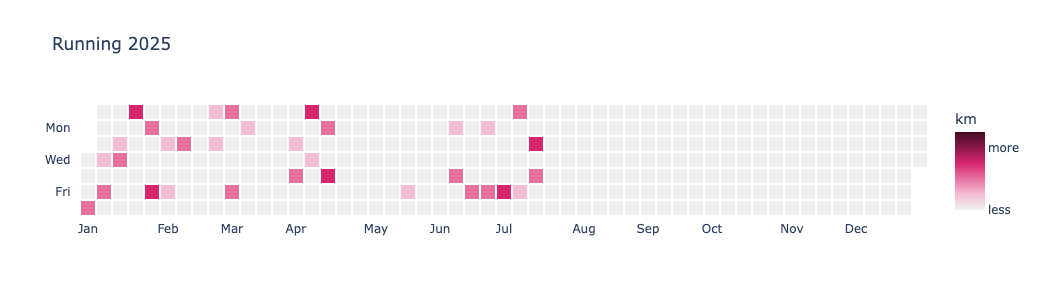

In [128]:
# bins
bins = [-1, 0, 3, 5, 8, 100]
num_colors = len(bins) - 1
# for the values we want to show
z_matrix = data.pivot(index="github_weekday", columns="calendar_week", values="distance_bin")
# for the date that we need for the labels when hovering
label_matrix = data.pivot(index="github_weekday", columns="calendar_week", values="hover_label")
label_matrix_str = label_matrix.astype(str).values 

# number of green tones
custom_colorscale = custom_color_scale(num_colors=num_colors, hue=336, saturation=0.7) # rosered :-) 
# labels for colorscale
lc = color_scale_labels(num_colors)

fig = go.Figure(go.Heatmap(
    z=z_matrix.values,                   # 2D data matrix
    x=z_matrix.columns,                  # weeks on x-axis
    y=z_matrix.index,    
    zmax = num_colors,
    zmin = 0,
    colorscale=custom_colorscale,
    xgap=2, ygap=2,                      # add spacing between cells
    colorbar = dict(
        title= "km",           # ✅ Title of the legend
        **color_scale_labels(num_colors)
    ),
    hoverongaps=False,
    text=label_matrix_str,    
    hovertemplate=(" %{text}<br>" +          # use the date string here
                   "<extra></extra>"  # hides trace name box
)))

# Make cells square
fig.update_yaxes(
    scaleanchor="x",     # enforce square aspect ratio
    autorange='reversed', # reverse to match GitHub style
    tickmode="array",
    range=[-0.5, 6.5],                    
    **weekday_labels_y()
)

fig.update_xaxes(
    **week_labels_x(2025)
)

fig.update_layout(
    plot_bgcolor='white',  
    width = 1000,
    height = 300,
    title = "Running 2025"
)

fig.show()

## Lets work on a good binning for our color scale!


In [605]:
run_df.head()

,date,distance_km,duration_min
0,2025-01-04,4.01524,29.859916
1,2025-01-08,2.66962,20.064484
2,2025-01-10,3.87244,30.039583
3,2025-01-14,2.77210,21.297249
4,2025-01-15,4.10387,30.036932


In [609]:
import seaborn as sns
import matplotlib.pyplot as plt

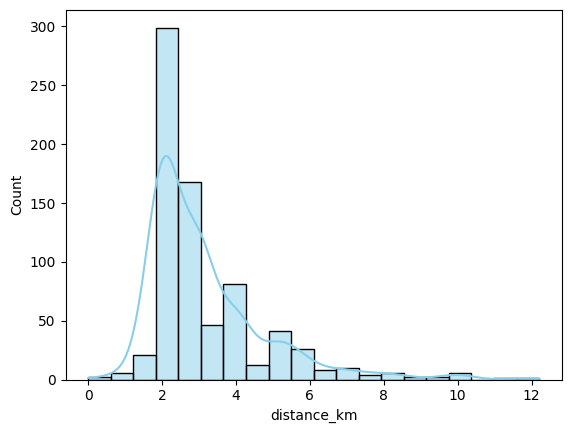

In [632]:
sns.histplot(run_df, x='distance_km', bins=20, kde=True, color="skyblue")
plt.show()

In [635]:
run_df.distance_km.round().value_counts()

distance_km
2.0     315
3.0     200
4.0      96
5.0      50
6.0      29
7.0      15
1.0      14
8.0       8
10.0      8
9.0       3
0.0       2
12.0      2
Name: count, dtype: int64

In [636]:
# 5 bins auswaehlen
# bin 1: bis 3k (gerundet natuerlich)
# bin 2: bis 5k
# bin 3: bis 7k
# bin 4: bis 9k
# bin 5: ab 10k

In [284]:
# do we want a way to filter for a particular year?

# start simple: just publish the chart 
- simply create an html file and then show it on github pages
- code design: what do we want to do?
  1. pull the data from Garmin (all data or incremental?) - mock this for now
  2. process the data into correct format for plotting
  3. plot and create html - DONE 